# Linear Regression with Spark MLlib

In [1]:
sc.install_pypi_package("sklearn")

VBox()

Starting Spark application


ID,YARN Application ID,Kind,State,Spark UI,Driver log,Current session?
6,application_1635428932804_0007,pyspark,idle,,,✔


FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

SparkSession available as 'spark'.


FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

  Using cached https://files.pythonhosted.org/packages/6a/7e/d41bc4dba43998890dadc6c7893f2d9b6a17bf7c9bb924458d04252ad0e6/scikit_learn-1.0.1-cp37-cp37m-manylinux_2_5_x86_64.manylinux1_x86_64.whl
  Using cached https://files.pythonhosted.org/packages/3e/d5/0163eb0cfa0b673aa4fe1cd3ea9d8a81ea0f32e50807b0c295871e4aab2e/joblib-1.1.0-py2.py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/ff/fe/8aaca2a0db7fd80f0b2cf8a16a034d3eea8102d58ff9331d2aaf1f06766a/threadpoolctl-3.0.0-py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/b5/6b/8bc0b61ebf824f8c3979a31368bbe38dd247590049a994ab0ed077cb56dc/scipy-1.7.1-cp37-cp37m-manylinux_2_5_x86_64.manylinux1_x86_64.whl

You are using pip version 9.0.1, however version 21.3.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.

In [2]:

sc.install_pypi_package("pandas==0.25.1")


VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

  Using cached https://files.pythonhosted.org/packages/7e/ab/ea76361f9d3e732e114adcd801d2820d5319c23d0ac5482fa3b412db217e/pandas-0.25.1-cp37-cp37m-manylinux1_x86_64.whl
  Using cached https://files.pythonhosted.org/packages/36/7a/87837f39d0296e723bb9b62bbb257d0355c7f6128853c78955f57342a56d/python_dateutil-2.8.2-py2.py3-none-any.whl

You are using pip version 9.0.1, however version 21.3.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.

In [3]:
sc.install_pypi_package("matplotlib==3.2.2")

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

  Using cached https://files.pythonhosted.org/packages/d9/aa/22af3c636d6b87e8d7f8f28c02da338e348ed08beff1e2b58843f0f62fc1/matplotlib-3.2.2-cp37-cp37m-manylinux1_x86_64.whl
  Using cached https://files.pythonhosted.org/packages/1b/19/8d24092f75e3bc7b4b2a78c9c63664bdeb00298acd15fad5d614da2a25b1/pyparsing-3.0.3-py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/f7/d2/e07d3ebb2bd7af696440ce7e754c59dd546ffe1bbe732c8ab68b9c834e61/cycler-0.10.0-py2.py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/09/6b/6e567cb2e86d4e5939a9233f8734e26021b6a9c1bc4b1edccba236a84cc2/kiwisolver-1.3.2-cp37-cp37m-manylinux_2_5_x86_64.manylinux1_x86_64.whl

You are using pip version 9.0.1, however version 21.3.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.

In [4]:
from sklearn import datasets
from pyspark.ml.regression import LinearRegression
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.feature import StringIndexer
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [5]:
boston = datasets.load_boston()

df = pd.DataFrame(boston.data, columns=boston.feature_names)
df['price'] = boston.target
df.head()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

      CRIM    ZN  INDUS  CHAS    NOX  ...    TAX  PTRATIO       B  LSTAT  price
0  0.00632  18.0   2.31   0.0  0.538  ...  296.0     15.3  396.90   4.98   24.0
1  0.02731   0.0   7.07   0.0  0.469  ...  242.0     17.8  396.90   9.14   21.6
2  0.02729   0.0   7.07   0.0  0.469  ...  242.0     17.8  392.83   4.03   34.7
3  0.03237   0.0   2.18   0.0  0.458  ...  222.0     18.7  394.63   2.94   33.4
4  0.06905   0.0   2.18   0.0  0.458  ...  222.0     18.7  396.90   5.33   36.2

[5 rows x 14 columns]
/tmp/1635441840748-0/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethi

In [6]:
sdf = spark.createDataFrame(df)
sdf.show(truncate=False)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+-------+----+-----+----+-----+-----+-----+------+---+-----+-------+------+-----+-----+
|CRIM   |ZN  |INDUS|CHAS|NOX  |RM   |AGE  |DIS   |RAD|TAX  |PTRATIO|B     |LSTAT|price|
+-------+----+-----+----+-----+-----+-----+------+---+-----+-------+------+-----+-----+
|0.00632|18.0|2.31 |0.0 |0.538|6.575|65.2 |4.09  |1.0|296.0|15.3   |396.9 |4.98 |24.0 |
|0.02731|0.0 |7.07 |0.0 |0.469|6.421|78.9 |4.9671|2.0|242.0|17.8   |396.9 |9.14 |21.6 |
|0.02729|0.0 |7.07 |0.0 |0.469|7.185|61.1 |4.9671|2.0|242.0|17.8   |392.83|4.03 |34.7 |
|0.03237|0.0 |2.18 |0.0 |0.458|6.998|45.8 |6.0622|3.0|222.0|18.7   |394.63|2.94 |33.4 |
|0.06905|0.0 |2.18 |0.0 |0.458|7.147|54.2 |6.0622|3.0|222.0|18.7   |396.9 |5.33 |36.2 |
|0.02985|0.0 |2.18 |0.0 |0.458|6.43 |58.7 |6.0622|3.0|222.0|18.7   |394.12|5.21 |28.7 |
|0.08829|12.5|7.87 |0.0 |0.524|6.012|66.6 |5.5605|5.0|311.0|15.2   |395.6 |12.43|22.9 |
|0.14455|12.5|7.87 |0.0 |0.524|6.172|96.1 |5.9505|5.0|311.0|15.2   |396.9 |19.15|27.1 |
|0.21124|12.5|7.87 |0.0 |0.524|5

In [7]:
assembler = VectorAssembler(inputCols=[c for c in sdf.columns if c != 'price'],
                            outputCol='features')
dataset = assembler.transform(sdf)
sdf.show(truncate=False)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+-------+----+-----+----+-----+-----+-----+------+---+-----+-------+------+-----+-----+
|CRIM   |ZN  |INDUS|CHAS|NOX  |RM   |AGE  |DIS   |RAD|TAX  |PTRATIO|B     |LSTAT|price|
+-------+----+-----+----+-----+-----+-----+------+---+-----+-------+------+-----+-----+
|0.00632|18.0|2.31 |0.0 |0.538|6.575|65.2 |4.09  |1.0|296.0|15.3   |396.9 |4.98 |24.0 |
|0.02731|0.0 |7.07 |0.0 |0.469|6.421|78.9 |4.9671|2.0|242.0|17.8   |396.9 |9.14 |21.6 |
|0.02729|0.0 |7.07 |0.0 |0.469|7.185|61.1 |4.9671|2.0|242.0|17.8   |392.83|4.03 |34.7 |
|0.03237|0.0 |2.18 |0.0 |0.458|6.998|45.8 |6.0622|3.0|222.0|18.7   |394.63|2.94 |33.4 |
|0.06905|0.0 |2.18 |0.0 |0.458|7.147|54.2 |6.0622|3.0|222.0|18.7   |396.9 |5.33 |36.2 |
|0.02985|0.0 |2.18 |0.0 |0.458|6.43 |58.7 |6.0622|3.0|222.0|18.7   |394.12|5.21 |28.7 |
|0.08829|12.5|7.87 |0.0 |0.524|6.012|66.6 |5.5605|5.0|311.0|15.2   |395.6 |12.43|22.9 |
|0.14455|12.5|7.87 |0.0 |0.524|6.172|96.1 |5.9505|5.0|311.0|15.2   |396.9 |19.15|27.1 |
|0.21124|12.5|7.87 |0.0 |0.524|5

In [8]:
dataset.select("features").show(truncate=False)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+----------------------------------------------------------------------------+
|features                                                                    |
+----------------------------------------------------------------------------+
|[0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.09,1.0,296.0,15.3,396.9,4.98]     |
|[0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.9,9.14]    |
|[0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03]   |
|[0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94]   |
|[0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.9,5.33]    |
|[0.02985,0.0,2.18,0.0,0.458,6.43,58.7,6.0622,3.0,222.0,18.7,394.12,5.21]    |
|[0.08829,12.5,7.87,0.0,0.524,6.012,66.6,5.5605,5.0,311.0,15.2,395.6,12.43]  |
|[0.14455,12.5,7.87,0.0,0.524,6.172,96.1,5.9505,5.0,311.0,15.2,396.9,19.15]  |
|[0.21124,12.5,7.87,0.0,0.524,5.631,100.0,6.0821,5.0,311.0,15.2,386.63,29.93]|
|[0.17004,12.5,7.87,0.0,0.524,6.004,85.9,6.5921,5.0,

In [9]:
dataset.cache() # <---

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

DataFrame[CRIM: double, ZN: double, INDUS: double, CHAS: double, NOX: double, RM: double, AGE: double, DIS: double, RAD: double, TAX: double, PTRATIO: double, B: double, LSTAT: double, price: double, features: vector]

In [10]:
lr = LinearRegression(featuresCol='features', labelCol='price')
model = lr.fit(dataset)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

## Importance of Individual Features

In [11]:
model.coefficients

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

DenseVector([-0.108, 0.0464, 0.0206, 2.6867, -17.7666, 3.8099, 0.0007, -1.4756, 0.306, -0.0123, -0.9527, 0.0093, -0.5248])

In [12]:
assembler.getInputCols()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']

In [13]:
plt.clf()
pd.Series(np.array(model.coefficients), index=assembler.getInputCols()).plot(kind='bar')

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

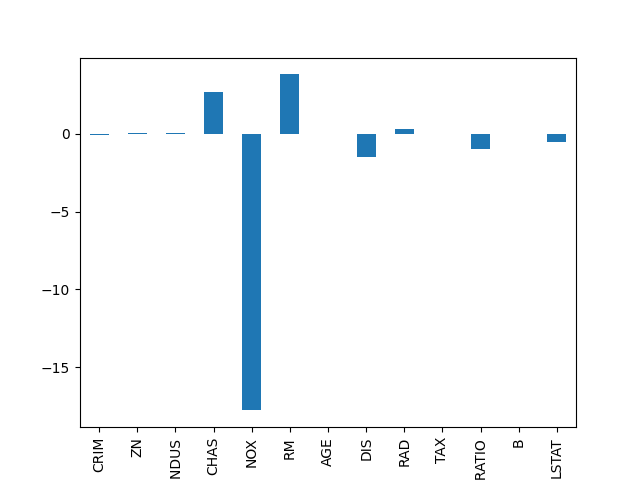

In [14]:
%matplot plt

# Getting Metrics

In [15]:
summary = model.evaluate(dataset)
summary.r2

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

0.7406426641094092

In [16]:
summary.explainedVariance

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

62.52472497443516

## Training on a subset of the data

In [17]:
subset = sdf.select("CHAS", "NOX", "RM", "price")
assembler = VectorAssembler(inputCols=[c for c in subset.columns if c != 'price'],
                            outputCol='features')
small_dataset = assembler.transform(subset)
small_dataset.show()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+----+-----+-----+-----+-----------------+
|CHAS|  NOX|   RM|price|         features|
+----+-----+-----+-----+-----------------+
| 0.0|0.538|6.575| 24.0|[0.0,0.538,6.575]|
| 0.0|0.469|6.421| 21.6|[0.0,0.469,6.421]|
| 0.0|0.469|7.185| 34.7|[0.0,0.469,7.185]|
| 0.0|0.458|6.998| 33.4|[0.0,0.458,6.998]|
| 0.0|0.458|7.147| 36.2|[0.0,0.458,7.147]|
| 0.0|0.458| 6.43| 28.7| [0.0,0.458,6.43]|
| 0.0|0.524|6.012| 22.9|[0.0,0.524,6.012]|
| 0.0|0.524|6.172| 27.1|[0.0,0.524,6.172]|
| 0.0|0.524|5.631| 16.5|[0.0,0.524,5.631]|
| 0.0|0.524|6.004| 18.9|[0.0,0.524,6.004]|
| 0.0|0.524|6.377| 15.0|[0.0,0.524,6.377]|
| 0.0|0.524|6.009| 18.9|[0.0,0.524,6.009]|
| 0.0|0.524|5.889| 21.7|[0.0,0.524,5.889]|
| 0.0|0.538|5.949| 20.4|[0.0,0.538,5.949]|
| 0.0|0.538|6.096| 18.2|[0.0,0.538,6.096]|
| 0.0|0.538|5.834| 19.9|[0.0,0.538,5.834]|
| 0.0|0.538|5.935| 23.1|[0.0,0.538,5.935]|
| 0.0|0.538| 5.99| 17.5| [0.0,0.538,5.99]|
| 0.0|0.538|5.456| 20.2|[0.0,0.538,5.456]|
| 0.0|0.538|5.727| 18.2|[0.0,0.538,5.727]|
+----+-----

In [18]:
lr = LinearRegression(featuresCol='features', labelCol='price')
small_model = lr.fit(small_dataset)
summary = small_model.evaluate(small_dataset)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [19]:
summary.r2

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

0.5555737130590865

In [20]:
summary.explainedVariance

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

46.90128626847629

## Exercise: Fit a Linear Regression on the Diabetes Dataset
### Step 1: Create a spark DataFrame, and prepare the dataset
### Step 2: Find the R2 score and explained variance
### Step 3: Find a subset of features with the highest absolute coefficients (by plotting)
### Step 4: Train a new model on this subset, and find R2 and explained variance

In [21]:
# Step 1
diabetes = datasets.load_diabetes()
# complete code below
df = None
assembler = None
dataset = None

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [22]:
# Step 2 - complete code below
lr = None
model = None
summary = None
print(summary.r2, summary.explainedVariance)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

'NoneType' object has no attribute 'r2'
Traceback (most recent call last):
AttributeError: 'NoneType' object has no attribute 'r2'



In [23]:
# Step 3:
# enter code here

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [24]:
# Step 4 - complete code below
subset = None
assembler = None
small_dataset = None

lr = None
model = None
summary = None
print(summary.r2, summary.explainedVariance)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

'NoneType' object has no attribute 'r2'
Traceback (most recent call last):
AttributeError: 'NoneType' object has no attribute 'r2'

